In [38]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [39]:
df = pd.read_csv("dataset_es_train.csv",on_bad_lines="skip",engine="python")
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [40]:
df.shape

(200000, 8)

In [41]:
sample = df.sample(1000)
sample.reset_index(drop=True,inplace=True)

In [42]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0962049,product_es_0710931,reviewer_es_0000658,5,"Es la segunda que compro. Genial, cumple su fu...",Buena compra,es,wireless
1,es_0569006,product_es_0544173,reviewer_es_0641132,2,"Una pena, pero con mi Pastor Alemán no ha func...",No funciona con mi perro,es,pc
2,es_0411779,product_es_0304327,reviewer_es_0210889,2,No me llegó en fecha. Sigo esperando. Espero m...,NO LLEGO EN FECHA,es,home
3,es_0725102,product_es_0551559,reviewer_es_0615270,4,Un poco pequeños. Entran pero me dejan señal e...,Pequeños.,es,apparel
4,es_0088046,product_es_0351930,reviewer_es_0518902,5,"Muy bonita,incluso mas que en la foto es dura ...",Preciosa,es,wireless
...,...,...,...,...,...,...,...,...
995,es_0868578,product_es_0984217,reviewer_es_0545594,3,envio bien y calidad buena carga muy bien en u...,ok pero viene sin el cab le de carga,es,wireless
996,es_0798781,product_es_0344186,reviewer_es_0348560,4,Cumple las expectativas,Cumplió mis expectativas,es,home
997,es_0880392,product_es_0865131,reviewer_es_0673586,1,Nos han engañado. La caja del juego viene en I...,Mentira!!!,es,video_games
998,es_0151185,product_es_0703879,reviewer_es_0238476,4,"Muy rápido en la entrega,buena calidad.Los pro...",La rapidez en la entrega.,es,furniture


In [43]:
df = sample[["review_body","stars"]]
df

,review_body,stars
0,"Es la segunda que compro. Genial, cumple su fu...",5
1,"Una pena, pero con mi Pastor Alemán no ha func...",2
2,No me llegó en fecha. Sigo esperando. Espero m...,2
3,Un poco pequeños. Entran pero me dejan señal e...,4
4,"Muy bonita,incluso mas que en la foto es dura ...",5
...,...,...
995,envio bien y calidad buena carga muy bien en u...,3
996,Cumple las expectativas,4
997,Nos han engañado. La caja del juego viene en I...,1
998,"Muy rápido en la entrega,buena calidad.Los pro...",4


In [44]:
# language detection
def lang_detect(df):
    lang = detect(df)
    return lang

In [45]:
print(df.review_body[0])
lang_detect(df.review_body[0])

Es la segunda que compro. Genial, cumple su función. La primera se rompió por un mal uso.


'es'

In [46]:
print(df.review_body[478])
lang_detect(df.review_body[478])

Cumple su función, quizás algo enclenque


'es'

In [47]:
df["language"] = df.review_body.apply(lang_detect)
df

,review_body,stars,language
0,"Es la segunda que compro. Genial, cumple su fu...",5,es
1,"Una pena, pero con mi Pastor Alemán no ha func...",2,es
2,No me llegó en fecha. Sigo esperando. Espero m...,2,es
3,Un poco pequeños. Entran pero me dejan señal e...,4,es
4,"Muy bonita,incluso mas que en la foto es dura ...",5,es
...,...,...,...
995,envio bien y calidad buena carga muy bien en u...,3,es
996,Cumple las expectativas,4,es
997,Nos han engañado. La caja del juego viene en I...,1,es
998,"Muy rápido en la entrega,buena calidad.Los pro...",4,es


In [48]:
df.language.unique()

array(['es', 'pt', 'ca', 'so', 'it', 'en', 'vi', 'cy', 'sk'], dtype=object)

In [49]:
df.language.nunique()

9

In [50]:
df.language.value_counts()

es    983
pt      9
ca      2
so      1
it      1
en      1
vi      1
cy      1
sk      1
Name: language, dtype: int64

In [51]:
# language translation
def lang_trans(df):
    translator = Translator()
    translated_text = translator.translate(df)
    return translated_text.text

In [52]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Es la segunda que compro. Genial, cumple su función. La primera se rompió por un mal uso.


"It's the second one I buy. Great, it does its job. The first one broke due to misuse."

In [53]:
df["translated_reviews"] = df.review_body.apply(lang_trans)
df

,review_body,stars,language,translated_reviews
0,"Es la segunda que compro. Genial, cumple su fu...",5,es,"It's the second one I buy. Great, it does its ..."
1,"Una pena, pero con mi Pastor Alemán no ha func...",2,es,"A shame, but it hasn't worked with my German S..."
2,No me llegó en fecha. Sigo esperando. Espero m...,2,es,It didn't arrive on time. I'm still waiting. I...
3,Un poco pequeños. Entran pero me dejan señal e...,4,es,A little small. They enter but leave a mark on...
4,"Muy bonita,incluso mas que en la foto es dura ...",5,es,"Very pretty, even more than in the photo, it i..."
...,...,...,...,...
995,envio bien y calidad buena carga muy bien en u...,3,es,Good shipping and good quality. It charges ver...
996,Cumple las expectativas,4,es,Meets expectations
997,Nos han engañado. La caja del juego viene en I...,1,es,They have deceived us. The game box comes in I...
998,"Muy rápido en la entrega,buena calidad.Los pro...",4,es,"Very fast delivery, good quality. We will try ..."


In [54]:
# Exploratory data analysis
def ngram_extractor(df,ngram_range):
    tokens = word_tokenize(df)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(" ".join(ngram1))
    return ngram_list1

In [55]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [It, 's, the, second, one, I, buy, ., Great, ,...
1      [A, shame, ,, but, it, has, n't, worked, with,...
2      [It, did, n't, arrive, on, time, ., I, 'm, sti...
3      [A, little, small, ., They, enter, but, leave,...
4      [Very, pretty, ,, even, more, than, in, the, p...
                             ...                        
995    [Good, shipping, and, good, quality, ., It, ch...
996                                [Meets, expectations]
997    [They, have, deceived, us, ., The, game, box, ...
998    [Very, fast, delivery, ,, good, quality, ., We...
999    [It, 's, a, little, expensive, to, install, bu...
Name: translated_reviews, Length: 1000, dtype: object

In [56]:
final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('.', 1599),
 ('the', 1543),
 (',', 1412),
 ('it', 1411),
 ('I', 921),
 ('and', 848),
 ('is', 799),
 ('to', 701),
 ('a', 639),
 ('not', 396),
 ('It', 373),
 ('for', 359),
 ('of', 357),
 ('very', 348),
 ('that', 319),
 ('The', 317),
 ("n't", 315),
 ('but', 311),
 ('in', 303),
 ('have', 297),
 ('with', 253),
 ('you', 243),
 ('good', 224),
 ('on', 209),
 ('they', 208)]

In [57]:
# preprocessing
def expand_text(df):
    expanded_text = contractions.fix(df)
    return expanded_text

In [58]:
stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")

def clean_data(df):
    tokens = word_tokenize(df)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

In [59]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [60]:
clean_text

0      [second, one, buy, great, job, first, one, bro...
1      [shame, not, worked, german, shepherd, tried, ...
2      [not, arrive, time, still, waiting, hope, arri...
3      [little, small, enter, leave, mark, feet, not,...
4          [pretty, even, photo, hard, resistant, happy]
                             ...                        
995    [good, shipping, good, quality, charges, well,...
996                                [meets, expectations]
997    [deceived, game, box, comes, italian, going, r...
998    [fast, delivery, good, quality, try, see, not,...
999    [little, expensive, install, fits, phone, well...
Name: translated_reviews, Length: 1000, dtype: object

In [61]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),1))
final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('not', 736),
 ('good', 269),
 ('quality', 159),
 ('one', 146),
 ('well', 141),
 ('product', 116),
 ('little', 104),
 ('like', 102),
 ('use', 83),
 ('price', 82),
 ('arrived', 80),
 ('bad', 71),
 ('time', 70),
 ('bought', 66),
 ('would', 65),
 ('without', 60),
 ('perfect', 59),
 ('since', 57),
 ('small', 54),
 ('also', 54),
 ('even', 53),
 ('buy', 52),
 ('expected', 52),
 ('recommend', 52),
 ('quite', 49)]

In [62]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),2))
final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('good quality', 35),
 ('not recommend', 25),
 ('not fit', 23),
 ('poor quality', 22),
 ('not like', 22),
 ('not know', 21),
 ('not buy', 21),
 ('not work', 18),
 ('not even', 17),
 ('would not', 17),
 ('good price', 16),
 ('works well', 15),
 ('long time', 15),
 ('one not', 14),
 ('not bad', 14),
 ('not come', 14),
 ('good product', 13),
 ('product not', 12),
 ('not give', 11),
 ('price quality', 11),
 ('price not', 11),
 ('good purchase', 10),
 ('quality price', 10),
 ('seems like', 10),
 ('fit well', 10)]

In [63]:
test = df[(df.stars<3)].reset_index(drop=True)
test

,review_body,stars,language,translated_reviews
0,"Una pena, pero con mi Pastor Alemán no ha func...",2,es,"A shame, but it hasn't worked with my German S..."
1,No me llegó en fecha. Sigo esperando. Espero m...,2,es,It didn't arrive on time. I'm still waiting. I...
2,"Buenas, tras usar la pala 2 veces ya se descas...",2,es,"Good, after using the racket 2 times it alread..."
3,"Una decepción de móvil, tenía un huawei P10 y ...",2,es,"A disappointment of a mobile phone, I had a Hu..."
4,Pues no se por que este producto no me ha lleg...,1,es,"Well, I don't know why this product hasn't arr..."
...,...,...,...,...
410,En principio funcionaron bien luego de 2 mes e...,2,es,"At first they worked well, after 2 months they..."
411,No me carga el móvil cuando pongo la batería n...,2,es,My phone doesn't charge when I put in the new ...
412,El líquido tiene que estar muy caliente para q...,1,es,The liquid has to be very hot for the drawing ...
413,Nos han engañado. La caja del juego viene en I...,1,es,They have deceived us. The game box comes in I...


In [64]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_bigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),2))
final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('not recommend', 25),
 ('poor quality', 19),
 ('not buy', 18),
 ('not fit', 17),
 ('not like', 16),
 ('not know', 15),
 ('not even', 14),
 ('not work', 13),
 ('would not', 11),
 ('product not', 10),
 ('not arrived', 8),
 ('not bad', 8),
 ('not arrive', 7),
 ('one not', 7),
 ('stopped working', 7),
 ('not cover', 7),
 ('not stick', 7),
 ('mobile phone', 6),
 ('well not', 6),
 ('not worth', 6),
 ('glass not', 6),
 ('price not', 6),
 ('not expected', 6),
 ('fit well', 6),
 ('never arrived', 6)]

In [65]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),3))
final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('would not buy', 8),
 ('not fit well', 5),
 ('leaves lot desired', 4),
 ('not work well', 4),
 ('not stick well', 3),
 ('not recommend anyone', 3),
 ('not cover entire', 3),
 ('not arrive time', 2),
 ('not know product', 2),
 ('product not arrived', 2),
 ('not arrived yet', 2),
 ('arrived poor condition', 2),
 ('not bad price', 2),
 ('month half use', 2),
 ('little power not', 2),
 ('not recommend price', 2),
 ('not received product', 2),
 ('not even last', 2),
 ('not glass plastic', 2),
 ('not read well', 2),
 ('plastic not recommend', 2),
 ('not recommend purchase', 2),
 ('delivery date arrived', 2),
 ('not cut hair', 2),
 ('not recommend purchasing', 2)]

#### word cloud

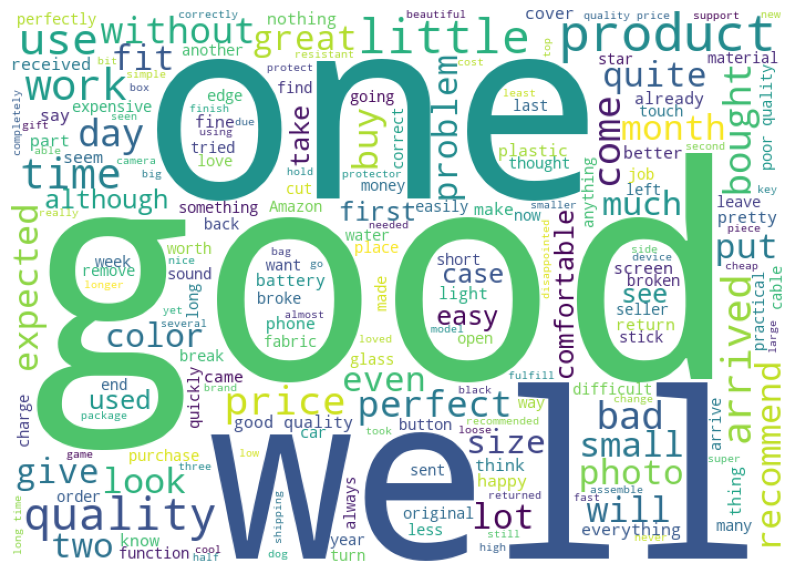

In [66]:
def word_cloud(df,column):
    df_ = df[column].str.cat(sep = " ")
    wordcloud = WordCloud(width=700,height=500, background_color="white").generate(df_)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show
    plt.savefig("word_cloud")
word_cloud(df,"translated_reviews")

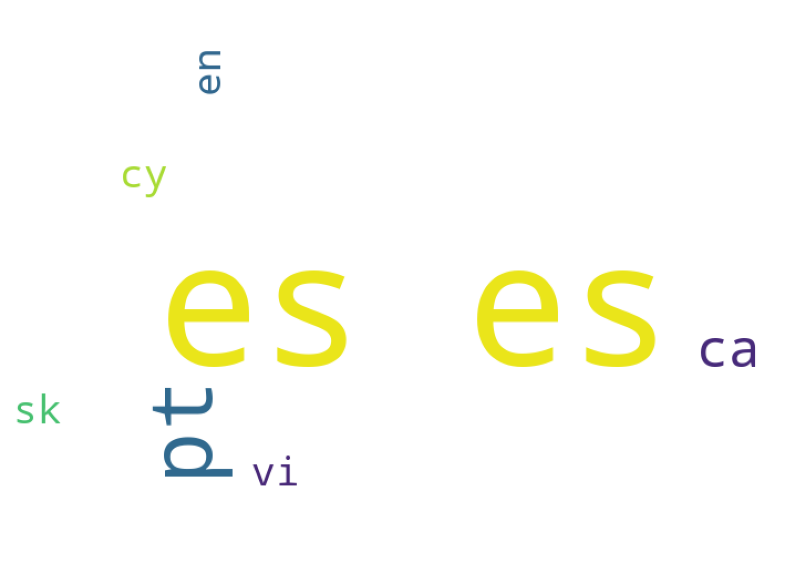

In [67]:
def word_cloud(df,column):
    df_ = df[column].str.cat(sep = " ")
    wordcloud = WordCloud(width=700,height=500, background_color="white").generate(df_)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show
    plt.savefig("Language")
word_cloud(df,"language")

In [68]:
# key phrase extraction

In [69]:
def yake_extractor(df):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(df)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

keywords = df.translated_reviews.apply(yake_extractor)
keywords

0      [buy, Great, due to misuse, job, misuse, broke...
1      [German Shepherd, Shepherd, German, shame, wor...
2      [arrive on time, time, arrives shortly, waitin...
3      [small, enter but leave, leave a mark, bad qua...
4      [hard and resistant, pretty, photo, resistant,...
                             ...                        
995    [good quality, Good shipping, shipping and goo...
996            [Meets expectations, Meets, expectations]
997     [Italian, deceived, game, box, return, game box]
998    [fast delivery, good quality, delivery, qualit...
999    [expensive to install, fits the phone, worst t...
Name: translated_reviews, Length: 1000, dtype: object

In [70]:
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 181),
 ('quality', 138),
 ('product', 95),
 ('arrived', 68),
 ('price', 67),
 ('bad', 60),
 ('bought', 60),
 ('time', 48),
 ('small', 46),
 ('Good', 41),
 ('expected', 41),
 ('perfect', 39),
 ('recommend', 38),
 ('works', 37),
 ('lot', 36),
 ('perfectly', 35),
 ('buy', 33),
 ('put', 33),
 ('work', 32),
 ('received', 32),
 ('size', 31),
 ('fit', 31),
 ('days', 31),
 ('fine', 31),
 ('good quality', 30),
 ('phone', 29),
 ('comfortable', 29),
 ('battery', 29),
 ('great', 28),
 ('give', 28),
 ('purchase', 27),
 ('color', 26),
 ('pretty', 25),
 ('case', 25),
 ('long', 25),
 ('happy', 24),
 ('screen', 24),
 ('photo', 23),
 ('thing', 23),
 ('Amazon', 22),
 ('return', 22),
 ('broke', 21),
 ('day', 21),
 ('easy', 21),
 ('money', 21),
 ('poor', 20),
 ('plastic', 20),
 ('light', 20),
 ('expensive', 20),
 ('job', 19),
 ('order', 19),
 ('month', 19),
 ('months', 19),
 ('fits', 19),
 ('function', 18),
 ('glass', 18),
 ('cover', 18),
 ('problem', 18),
 ('worth', 17),
 ('quickly', 17),
 ('bro

In [71]:
def rake_extractor(df):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(df)
    return keyword_extractor.get_ranked_phrases()

rake_keywords = df.translated_reviews.apply(rake_extractor)
rake_keywords

0      [first one broke due, second one, misuse, job,...
1      [german shepherd, worked, tried, shame, dogs, ...
2      [arrives shortly since, month since, still wai...
3      [look bad quality, would order, little small, ...
4          [resistant, pretty, photo, hard, happy, even]
                             ...                        
995    [iphone 8 plus, iphone one, good shipping, goo...
996                                 [meets expectations]
997    [game box comes, deceived us, return, italian,...
998    [pay double shipping costs, seem good, good qu...
999    [fingers get stuck, worst thing, rubbery feel,...
Name: translated_reviews, Length: 1000, dtype: object

In [72]:
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(500)
cnt

[('good', 86),
 ('one', 65),
 ('use', 65),
 ('product', 62),
 ('like', 59),
 ('price', 56),
 ('quality', 55),
 ('well', 53),
 ('bought', 49),
 ('expected', 46),
 ('lot', 44),
 ('recommend', 42),
 ('put', 42),
 ('since', 37),
 ('arrived', 36),
 ('buy', 35),
 ('time', 35),
 ('give', 34),
 ('comfortable', 33),
 ('used', 33),
 ('see', 33),
 ('bad', 33),
 ('easy', 33),
 ('work', 32),
 ('perfect', 31),
 ('know', 30),
 ('good quality', 30),
 ('although', 30),
 ('happy', 29),
 ('small', 29),
 ('come', 28),
 ('fine', 28),
 ('case', 27),
 ('photo', 26),
 ('think', 26),
 ('phone', 25),
 ('received', 25),
 ('color', 25),
 ('return', 24),
 ('little', 23),
 ('great', 22),
 ('pretty', 22),
 ('without', 22),
 ('problem', 22),
 ('even', 21),
 ('money', 21),
 ('practical', 21),
 ('fit', 20),
 ('made', 20),
 ('difficult', 20),
 ('purchase', 19),
 ('would', 19),
 ('tried', 18),
 ('screen', 18),
 ('thought', 18),
 ('much', 18),
 ('want', 18),
 ('nothing', 18),
 ('...', 17),
 ('also', 17),
 ('cover', 17),
 

#### Preprocessing

In [75]:
# 1 remove spaces,new line
def remove_spaces(df):
    clean_text = df.replace ("\\n"," ").replace("\t"," ").replace("\\"," ")
    return clean_text

# 2 contraction mapping
def expand_text(df):
    expanded_text = contractions.fix(df)
    return expanded_text

# 3 handling accented chatacters
def handling_accented(df):
    fixed_text = unidecode(df)
    return fixed_text

# 4 cleaning
stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("not")
stopword_list.remove("nor")

def clean_data(df):
    tokens = word_tokenize(df)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and 
                 (word.isalpha())]
    return clean_text
# 5 autocorrect
def autocorrection(df):
    spell = Speller(lan = "en")
    corrected_text = spell(df)
    return corrected_text

# 6 Lematization
def lemmatization(df):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in df:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [76]:
clean_text_train = df.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

In [77]:
clean_text_train

0      second one buy great job first one broke due m...
1      shame not worked german shepherd tried dog detect
2      not arrive time still waiting hope arrives sho...
3      little small enter leave mark foot not look ba...
4                 pretty even photo hard resistant happy
                             ...                        
995    good shipping good quality charge well iphone ...
996                                     meet expectation
997          deceived game box come italian going return
998    fast delivery good quality try see not seem go...
999    little expensive install fit phone well worst ...
Name: translated_reviews, Length: 1000, dtype: object

#### text vectorization

In [78]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow, columns = count_vect.get_feature_names_out())

,able,absolutely,absurd,accept,acceptable,accepted,access,accessible,accessory,accidentally,...,year,yellow,yes,yesterday,yet,youtube,zelda,zero,zipper,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### tfidf

In [79]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns = tfidf_vect.get_feature_names_out())

,able,absolutely,absurd,accept,acceptable,accepted,access,accessible,accessory,accidentally,...,year,yellow,yes,yesterday,yet,youtube,zelda,zero,zipper,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### word2vec

In [80]:
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
splitted_sent

[['second',
  'one',
  'buy',
  'great',
  'job',
  'first',
  'one',
  'broke',
  'due',
  'misuse'],
 ['shame', 'not', 'worked', 'german', 'shepherd', 'tried', 'dog', 'detect'],
 ['not',
  'arrive',
  'time',
  'still',
  'waiting',
  'hope',
  'arrives',
  'shortly',
  'since',
  'almost',
  'month',
  'since',
  'order'],
 ['little',
  'small',
  'enter',
  'leave',
  'mark',
  'foot',
  'not',
  'look',
  'bad',
  'quality',
  'would',
  'order',
  'larger',
  'size'],
 ['pretty', 'even', 'photo', 'hard', 'resistant', 'happy'],
 ['good',
  'using',
  'racket',
  'time',
  'already',
  'chipped',
  'side',
  'good',
  'racket',
  'beginner',
  'quality',
  'material',
  'least',
  'outside',
  'poor'],
 ['small', 'size', 'not', 'fit', 'finger', 'adult', 'fun', 'child'],
 ['disappointment',
  'mobile',
  'phone',
  'huawei',
  'gave',
  'magnificent',
  'result',
  'last',
  'day',
  'could',
  'not',
  'happier',
  'phone',
  'expected',
  'give',
  'result',
  'quite',
  'opposite

In [81]:
word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)

In [82]:
word_2vec_model.save("word2vec.model")

In [83]:
word_2vec_model.vector_size

100

In [ ]:
# documenting numeric format

In [88]:
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew:
            try:
                word in model.wv
                vectors.append(model.wv[word])
            except KeyError:
                continue
               
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis = 0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature

In [89]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)
vectorized_docs

[array([-7.60853523e-03,  4.31150049e-02,  9.37299710e-03,  2.29813829e-02,
        -8.17949697e-03, -8.08142200e-02,  4.08750139e-02,  9.67155546e-02,
        -3.84489633e-02, -2.08867993e-02, -1.44630857e-02, -6.03188351e-02,
        -3.30493301e-02,  1.19320611e-02,  8.25353432e-03, -3.90992202e-02,
         5.71986288e-03, -5.92487380e-02, -1.64512377e-02, -9.30414274e-02,
         2.75756996e-02,  2.76412740e-02,  3.12427655e-02, -1.40334629e-02,
        -9.25443228e-03, -3.44511704e-03, -2.49534845e-02, -4.54955846e-02,
        -3.71576771e-02,  3.35471425e-03,  4.28085141e-02, -1.71911914e-03,
         3.68968733e-02, -3.63424234e-02, -2.66077481e-02,  5.07067703e-02,
         7.83329085e-03, -5.71087450e-02, -3.62248309e-02, -1.04922980e-01,
        -1.54588623e-02, -3.54615971e-02, -2.21817568e-02, -1.29238330e-02,
         4.46283370e-02, -1.36059485e-02, -4.54492569e-02, -1.62181573e-03,
         3.20323743e-02,  2.74202731e-02,  2.28296351e-02, -3.31363343e-02,
        -1.0

In [91]:
vectorized_docs[1]

array([-7.4724071e-03,  3.2117538e-02,  6.2488317e-03,  1.2241514e-02,
       -7.8955246e-03, -5.4289203e-02,  3.0268155e-02,  6.2808573e-02,
       -2.3704484e-02, -2.0919368e-02, -7.9066781e-03, -4.4489391e-02,
       -2.6287867e-02,  9.0845302e-03,  6.1271125e-03, -2.4224561e-02,
        3.8350893e-03, -4.1299142e-02, -1.0351368e-02, -6.3233279e-02,
        1.9042132e-02,  2.3193188e-02,  2.0473095e-02, -1.1390146e-02,
       -7.3436531e-03, -2.1153302e-03, -2.0257421e-02, -3.1805195e-02,
       -2.6823461e-02,  1.9803138e-03,  2.4096435e-02, -4.6571798e-04,
        2.5100255e-02, -2.3018003e-02, -1.6493157e-02,  3.4664322e-02,
        6.4066388e-03, -3.8701069e-02, -2.1037512e-02, -7.3814295e-02,
       -5.4189083e-03, -2.3330050e-02, -1.5902098e-02, -9.2664305e-03,
        3.1433936e-02, -9.3252929e-03, -2.6719181e-02,  3.4074609e-03,
        2.2158165e-02,  1.9606687e-02,  1.6479414e-02, -1.9500576e-02,
       -6.1806198e-03,  7.3070703e-03, -1.0019789e-02,  9.8634819e-03,
      

In [92]:
type(vectorized_docs)

list

In [93]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.00760854,  0.043115  ,  0.009373  , ..., -0.04903962,
         0.03434742, -0.01356687],
       [-0.00747241,  0.03211754,  0.00624883, ..., -0.03385652,
         0.02015295, -0.0094237 ],
       [-0.00994078,  0.04256333,  0.0142989 , ..., -0.04527689,
         0.02954142, -0.00926563],
       ...,
       [-0.00944404,  0.03732195,  0.01031052, ..., -0.03955795,
         0.01890464, -0.00792509],
       [-0.012487  ,  0.04618639,  0.01674523, ..., -0.05051972,
         0.03055872, -0.01002925],
       [-0.00640598,  0.03114543,  0.00848948, ..., -0.03552613,
         0.0227277 , -0.01014945]], dtype=float32)

In [94]:
type(x_emb)

numpy.ndarray

In [95]:
# building k means
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters= clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [96]:
# kmeans with count vectorizer
kmeans_model_count,count_pred = build_kmeans(3,bow)

In [98]:
kmeans_model_count

KMeans(n_clusters=3)

In [97]:
count_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,

In [99]:
# kmeans with tfidf
kmeans_model_tfidf,tfidf_pred = build_kmeans(3,tfidf)

In [100]:
tfidf_pred

array([0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2,
       1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2,
       0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1,

In [101]:
# kmeans with word2vec
kmeans_model_word2vec,word2vec_pred = build_kmeans(3,x_emb)

In [102]:
word2vec_pred

array([2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1,

In [103]:
# silhouette_score
print(f"silhouette score with kmeans_count : {silhouette_score(bow,count_pred)}")
print(f"silhouette score with kmeans_tfidf : {silhouette_score(tfidf,tfidf_pred)}")
print(f"silhouette score with kmeans_word2vec : {silhouette_score(x_emb,word2vec_pred)}")

silhouette score with kmeans_count : 0.16383194656622316
silhouette score with kmeans_tfidf : 0.005941872380574404
silhouette score with kmeans_word2vec : 0.45922669768333435


In [104]:
# visualizing silhouette_score
def visualize_silhouette(data,model,title1):
    print(f"silhouette visualizer for {title1}")
    visualizer = SilhouetteVisualizer(model,colors= "yellowbrick")
    visualizer.fit(data)
    visualizer.show()

silhouette visualizer for kmeans_count_vectorizer


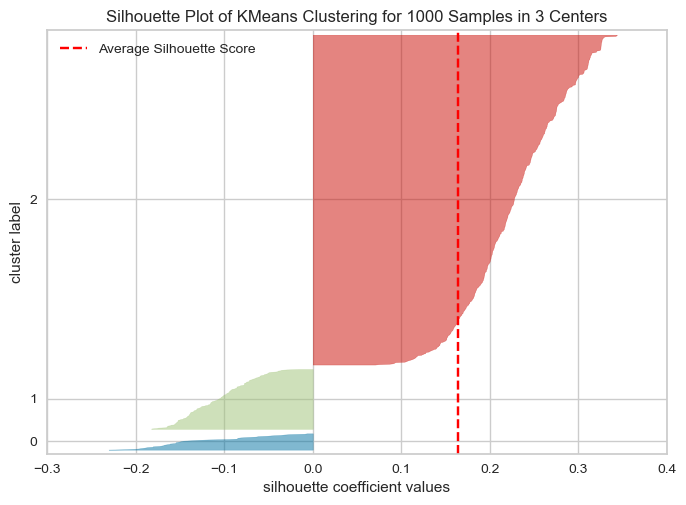

In [105]:
# kmeans count
visualize_silhouette(bow,kmeans_model_count,"kmeans_count_vectorizer")

silhouette visualizer for kmeans_tfidf_vectorizer


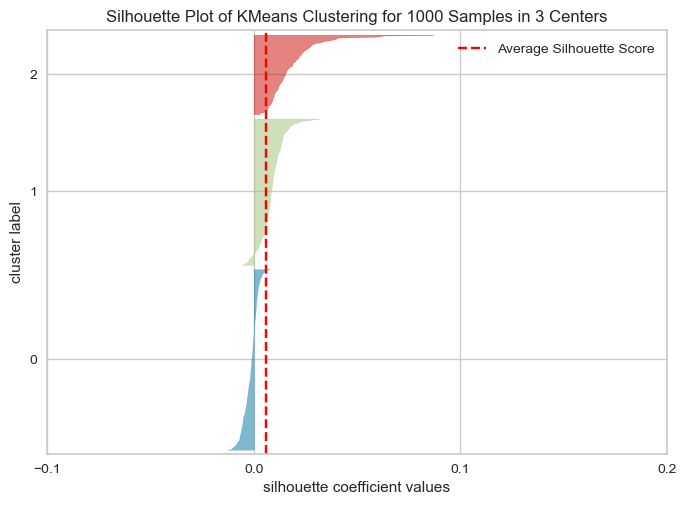

In [106]:
# kmaeans tfidf
visualize_silhouette(tfidf,kmeans_model_tfidf,"kmeans_tfidf_vectorizer")

silhouette visualizer for kmeans_word2vec


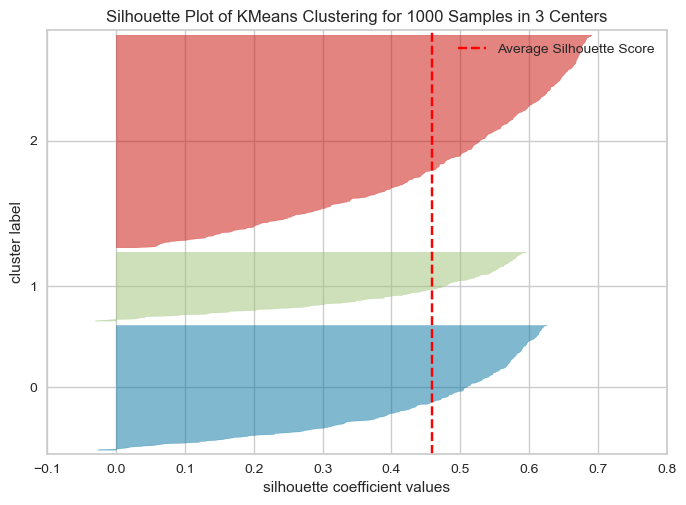

In [107]:
# kmaeans word2vec
visualize_silhouette(x_emb,kmeans_model_word2vec,"kmeans_word2vec")

In [108]:
df["target"] = pd.Series(word2vec_pred)
df

,review_body,stars,language,translated_reviews,target
0,"Es la segunda que compro. Genial, cumple su fu...",5,es,"It's the second one I buy. Great, it does its ...",2
1,"Una pena, pero con mi Pastor Alemán no ha func...",2,es,"A shame, but it hasn't worked with my German S...",0
2,No me llegó en fecha. Sigo esperando. Espero m...,2,es,It didn't arrive on time. I'm still waiting. I...,2
3,Un poco pequeños. Entran pero me dejan señal e...,4,es,A little small. They enter but leave a mark on...,2
4,"Muy bonita,incluso mas que en la foto es dura ...",5,es,"Very pretty, even more than in the photo, it i...",2
...,...,...,...,...,...
995,envio bien y calidad buena carga muy bien en u...,3,es,Good shipping and good quality. It charges ver...,1
996,Cumple las expectativas,4,es,Meets expectations,0
997,Nos han engañado. La caja del juego viene en I...,1,es,They have deceived us. The game box comes in I...,2
998,"Muy rápido en la entrega,buena calidad.Los pro...",4,es,"Very fast delivery, good quality. We will try ...",2


In [ ]:
# model training